In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the Dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape 

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

We have 10 classes here

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

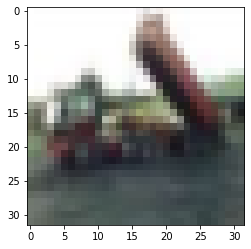

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[2], interpolation='nearest')
plt.show()

Normalisation of Dataset

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8156 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.6252 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5427 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 118s 75ms/step - loss: 1.4810 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4313 - accuracy: 0.4971


CNN Model for Image Classification

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5218 - accuracy: 0.4490
Epoch 2/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.1570 - accuracy: 0.5938
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0195 - accuracy: 0.6448
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9282 - accuracy: 0.6797
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8643 - accuracy: 0.7015
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8129 - accuracy: 0.7188
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7682 - accuracy: 0.7327
Epoch 8/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.7293 - accuracy: 0.7463
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6922 - accuracy: 0.7584
Epoch 10/10
1563/1563 [==============================] - 67s 43m

Making predictions on test data

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9179 - accuracy: 0.6898


[0.917930543422699, 0.6898000240325928]

Some Visual Inspection on the predictions

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[0:10]

313/313 [==============================] - 6s 18ms/step


array([[2.02041148e-04, 7.69128201e-06, 6.77503820e-04, 9.00211513e-01,
        1.79972849e-04, 2.59589273e-02, 5.77067956e-03, 4.66896599e-05,
        6.69353381e-02, 9.55495398e-06],
       [1.92199857e-03, 9.99992713e-04, 2.02133779e-05, 6.14046655e-07,
        2.12477880e-06, 5.34503570e-08, 2.69382152e-08, 6.24823201e-07,
        9.97042298e-01, 1.19504848e-05],
       [3.80599424e-02, 2.83194967e-02, 4.37781971e-04, 1.64003391e-03,
        1.54934925e-04, 9.23072657e-05, 6.46828907e-04, 7.67844555e-04,
        9.25728023e-01, 4.15283442e-03],
       [8.16041410e-01, 3.92184267e-03, 8.46246351e-03, 6.33244030e-03,
        1.16439089e-02, 9.84301805e-05, 1.43151102e-03, 1.85092515e-03,
        1.49747521e-01, 4.69542487e-04],
       [3.48951180e-05, 1.13774062e-04, 1.10621676e-02, 2.45659668e-02,
        6.40371740e-01, 7.33315363e-04, 3.22980225e-01, 5.59950131e-05,
        7.63496209e-05, 5.50642289e-06],
       [1.22044329e-03, 2.16077184e-04, 1.76293552e-02, 4.34754118e-02,
   

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[0:10]

[3, 8, 8, 0, 4, 6, 1, 6, 3, 1]

In [ ]:
y_test[0:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
y

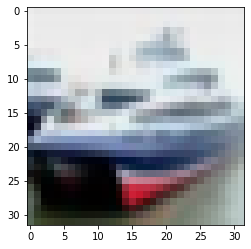

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_test[1], interpolation='nearest')
plt.show()